
# Data Preprocessing and Feature Engineering in Machine Learning

### Objective
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
### Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


## 1.Load and Explore the Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load dataset
df = pd.read_csv("adult_with_headers (1).csv")

# Display info
display(df.info())
display(df.head())

# Summary statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN



### Explanation
- By importing the dataset and exploring its structure.  
- The `info()` method reveals column data types and missing values.  
- `describe()` gives summary statistics for numerical and categorical features.

## Handling Missing Values

In [27]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Count missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing categorical features with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64



### Explanation
- The dataset contains missing values marked as `'?'`, replaced with `NaN` for consistency.  
- Missing categorical values are imputed using mode (most frequent category).  
- This preserves data integrity while avoiding loss of information.

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# (a)Standard Scaling
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])

# (b)Min-Max Scaling
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df[num_cols])

df_std[num_cols].head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


### Discussion
Standard Scaling (Z-score Normalization):
Used when data follows a normal (Gaussian) distribution or when algorithms assume standardized input (e.g., SVM, PCA, Logistic Regression).

Min-Max Scaling:
Scales data to a range [0, 1]; suitable for bounded features or models sensitive to magnitude differences (e.g., Neural Networks, KNN)

## 2.Encoding Techniques

In [29]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# One-Hot Encoding for columns with <=5 unique values
low_card_cols = [c for c in cat_cols if df[c].nunique() <= 5]
df_encoded = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [30]:
# Label Encoding for other categorical columns
label_enc = LabelEncoder()
for c in [col for col in cat_cols if col not in low_card_cols]:
    df_encoded[c] = label_enc.fit_transform(df_encoded[c])
    

In [31]:
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


### Discussion

#### One-Hot Encoding
- *Definition:* Creates separate binary (0/1) columns for each category.
- *When to Use:* For categorical features with *few unique values* (e.g., sex, race).
- *Pros:*
  - No assumption of order between categories.
  - Works well with linear models.
- *Cons:*
  - Increases dimensionality significantly for features with many categories (e.g., country).

#### Label Encoding
- *Definition:* Assigns each category a unique integer.
- *When to Use:* For *high-cardinality* categorical features or with *tree-based models*.
- *Pros:*
  - Compact representation, low memory usage.
  - Suitable for algorithms that can handle ordinal relations (e.g., Random Forest, XGBoost).
- *Cons:*
  - Introduces a false sense of order in linear models, which may mislead them.

## 3.Feature Engineering

In [32]:

# New Feature 1: Age Group
df_encoded['age_group'] = pd.cut(df_encoded['age'],
                                 bins=[0, 25, 45, 65, 100],
                                 labels=['Young', 'Adult', 'Mid-age', 'Senior'])

# New Feature 2: Net Capital Balance
df_encoded['capital_balance'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

df_encoded[['age', 'age_group', 'capital_gain', 'capital_loss', 'capital_balance']].head()


,age,age_group,capital_gain,capital_loss,capital_balance
0,39,Adult,2174,0,2174
1,50,Mid-age,0,0,0
2,38,Adult,0,0,0
3,53,Mid-age,0,0,0
4,28,Adult,0,0,0



### Explanation
1. **`age_group`:**  This feature divides people into different age ranges (like Young, Adult, Mid-age, Senior).
It helps the model understand how age affects income in different life stages.  
2. **`capital_balance`:** This feature combines capital_gain and capital_loss into one number.
It shows a person’s overall financial result — how much they gained or lost in total. 

## Transformation of Skewed Features

capital_gain    11.953848
capital_loss     4.594629
dtype: float64


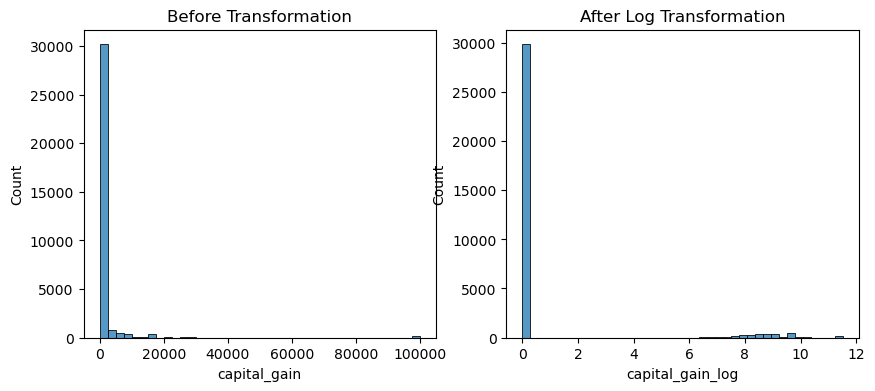

In [33]:
# Check skewness
print(df_encoded[['capital_gain', 'capital_loss']].skew())

# Log-transform 'capital_gain' due to skewness
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

# Compare before and after
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df_encoded['capital_gain'], bins=40, ax=axes[0])
axes[0].set_title('Before Transformation')
sns.histplot(df_encoded['capital_gain_log'], bins=40, ax=axes[1])
axes[1].set_title('After Log Transformation')
plt.show()



### Explanation
- The **`capital_gain`** feature is highly skewed, meaning most values are near zero with few extreme outliers.  
- Applying log(1 + x) transformation reduces skewness, making data more normally distributed and improving model performance.  
---


## Summary of Findings
| Step | Technique | Purpose |
|------|------------|----------|
| Missing Values | Mode Imputation | Preserve information without dropping rows |
| Scaling | Standard & Min-Max | Normalize features for algorithms |
| Encoding | One-Hot & Label | Convert categorical features for ML |
| Feature Engineering | `age_group`, `capital_balance` | Add domain-driven features |
| Transformation | Log Transform | Reduce skewness and improve normality |
